# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [45]:
import pandas as pd

tabela= pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

CORRELAÇÃO DAS INFORMAÇÕES
É um número que vai de 0 a 1. O quão correlacionado estão duas coisas. 
Se tudo caminha junto. (10-1, 20-2, 30-3; 10 - 2, 20 - 4, 30 - 60)
Se não está tão certinho, vai ser um número muito perto de 1, mas não vai ser 1.
Quando caminham aleatoriamente, vai ser um número muito perto de 0.
O valor em si, não interessa muito. 

In [46]:
tabela.corr()

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


O que mais importa é a última linha. Vendas relacionado aos meios de comunicação.
Como fazer isso com datas: extrair grandezas, por exemplo: extrair o mês. Pode-se fazer uma análise de sazonalidade.

Para ficar mais intuitivo, podemos criar gráficos!!!!!

In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

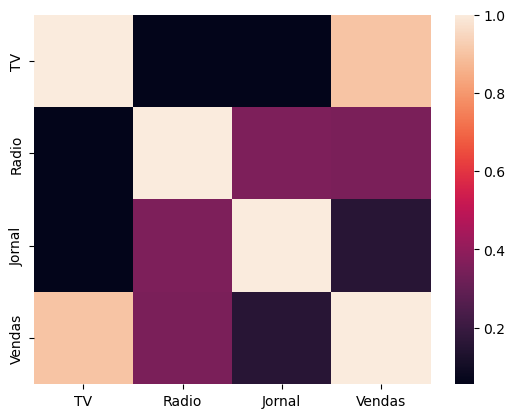

In [47]:
import matplotlib.pyplot as plt  #primeira biblioteca do python para gráficos, meio chata de usar
import seaborn as sns #preciso usar o matplotlib para usar o seaborn 

#criar o gráfico
sns.heatmap(tabela.corr())
#plota o gráfico
plt.show()

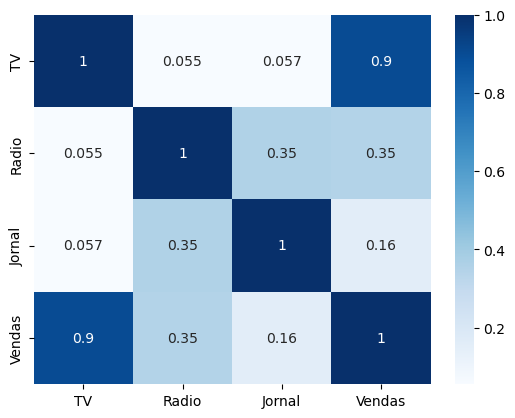

In [48]:
#criar o gráfico
sns.heatmap(tabela.corr(), cmap='Blues', annot=True)
#plota o gráfico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [49]:
y = tabela["Vendas"]
x = tabela[["TV", "Jornal","Radio"]]

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1) #random_state é pra parar de ser aleatória

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear: 
- RandomForest (Árvore de Decisão)

Usando dois modelos para comparar os modelos.

Para informações não numéricas: ferramentas que transformam texto em números, fazem a análise e depois convertem em número de novo (processo de encoding). Exemplo: one hot encoding.

In [50]:
# importar o modelo
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a inteligencia
modelo_regressaolinear = LinearRegression()
modelo_randomforest = RandomForestRegressor()

# treinar a inteligencia
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_randomforest.fit(x_treino, y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [51]:
previsaoLR = modelo_regressaolinear.predict(x_teste)
previsaoRF = modelo_randomforest.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsaoLR))
print(r2_score(y_teste, previsaoRF))

0.9071151423684273
0.9635304887047671


#### Visualização Gráfica das Previsões

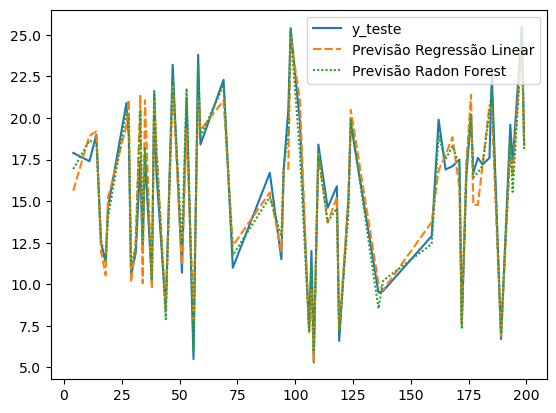

In [52]:
tabela_aux = pd.DataFrame()
tabela_aux["y_teste"] = y_teste
tabela_aux["Previsão Regressão Linear"] =previsaoLR;
tabela_aux["Previsão Radon Forest"] = previsaoRF

#display(tabela_aux)
sns.lineplot(data=tabela_aux)
plt.show()

#### Como fazer uma nova previsão?

In [53]:
nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)
previsaoLR_novos = modelo_regressaolinear.predict(nova_tabela[["TV", "Jornal", "Radio"]])
previsaoRF_novos = modelo_randomforest.predict(nova_tabela[["TV", "Jornal", "Radio"]])
print(previsaoRF_novos)
print(previsaoLR_novos)

#tabela_aux_novos = pd.DataFrame()
#tabela_aux_novos["Previsão Regressão Linear"] =previsaoLR_novos;
#tabela_aux_novos["Previsão Radon Forest"] = previsaoLR_novos

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.5    8.641 19.523]
[ 6.21773863  7.10231782 18.73172075]
